<a href="https://colab.research.google.com/github/jacosta387/cd_202202_jose_acosta/blob/main/Dengue_Cluster_Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**TALLER 4 - CASOS DE DENGUE 2020 APLICANDO CLUSTERING**

Análisis de casos de dengue.


In [ ]:
!pip install pyproj
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Importar** **Librerias**

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Generar gráficos estadisticos, integra con libreria pandas.
import matplotlib.pyplot as plt # Generar gráficos
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# **Cargar Datos**

In [ ]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)

# **Leer Datos** 

In [ ]:
df.head()

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980


In [ ]:
# Tipos de datos
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

Encontrar si hay valores nulos en nuestro conjunto de datos

In [ ]:
Missing_values=df.isnull().sum()

In [ ]:
Missing_values # Listado de valores null o vacios.

ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

# **Visualizacion de los datos que faltan**

In [ ]:
df.isnull() #devuelve un valor True (verdadero), si el valor es nulo.

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1258,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1259,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1260,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Trazado de los valores perdidos en los registros de casos de dengue.

Text(0.5, 1.0, 'Valores perdidos casos de dengue 2020')

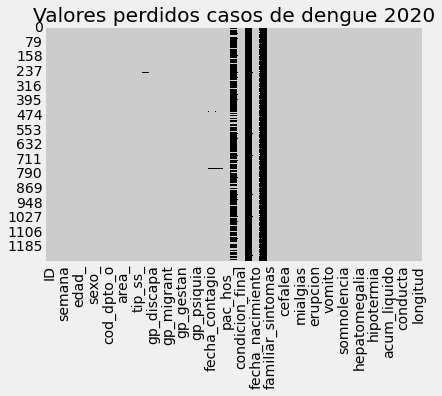

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='nipy_spectral_r') #se usa heatmap para el gráfico en forma de espectro
plt.title('Valores perdidos casos de dengue 2020') #Imprime titulo del gráfico

Filtrar columnas del dataframe de los datos que no van a ser objeto de análisis.

In [ ]:
df2 = df[['semana', 'edad_','uni_med_','sexo_','cod_dpto_o','cod_mun_o','gp_discapa','gp_desplaz',
          'gp_migrant','gp_carcela','gp_gestan','gp_calle','gp_psiquia','gp_vic_vio','pac_hos_','familiar_sintomas',
          'fiebre','cefalea','dolor_retroocular','mialgias','artralgia','erupcion','dolor_abdomen','vomito','diarrea',
          'somnolencia','hipotension','hepatomegalia','hemorragia_mucosa','hipotermia','caida_plaquetas','acum_liquido',
          'aum_hematocrito','latitud','longitud']].copy()
df2.head()
          

,semana,edad_,uni_med_,sexo_,cod_dpto_o,cod_mun_o,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud
0,1,25,1,F,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.076011,-73.102501
1,1,24,1,M,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.079495,-73.105400
2,1,58,1,M,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.090290,-73.091003
3,1,29,1,F,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.067435,-73.090958
4,1,56,1,F,68,276,2,2,2,2,...,2,2,2,2,2,1,2,2,7.066905,-73.104980


In [ ]:
df2.dtypes

semana                 int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_dpto_o             int64
cod_mun_o              int64
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
pac_hos_               int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
latitud              float64
longitud      

In [ ]:
# Reemplazo por valores númericos 1 y 2 en la columna 'sexo'.
df2.sexo_ = df2.sexo_.replace({"M": 1, "F": 2})

In [ ]:
#Se verifica el reemplazo de los valores númericos en la columna sexo.
df2.dtypes

semana                 int64
edad_                  int64
uni_med_               int64
sexo_                  int64
cod_dpto_o             int64
cod_mun_o              int64
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
pac_hos_               int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
latitud              float64
longitud      

In [ ]:
df2.head()

,semana,edad_,uni_med_,sexo_,cod_dpto_o,cod_mun_o,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud
0,1,25,1,2,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.076011,-73.102501
1,1,24,1,1,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.079495,-73.105400
2,1,58,1,1,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.090290,-73.091003
3,1,29,1,2,68,276,2,2,2,2,...,2,2,2,2,2,2,2,2,7.067435,-73.090958
4,1,56,1,2,68,276,2,2,2,2,...,2,2,2,2,2,1,2,2,7.066905,-73.104980


# Análisis de datos preliminar usando el coeficiente de correlación lineal de Pearson:

El coeficiente de correlación de Pearson varía entre -1 y 1 cuando el coeficiente se acerca al 1 indica que la relación es mayor ya sea directa o inversamente proporcional, ya sea si se acerca a +1 o al -1 . Cuando el coeficiente tiende a 0 no hay relación. El gráfico de color (heatmap) favorece el análisis visual ya que aquellas variables con los colores mas claros están mas relacionadas y las más oscuras menos relacionadas. Los cruces de la misma variable contra si misma aparecen en color amarillo por razones obvias.

Una posible correlación esta dada por los sintomas y el paciente hospitalizado debido a sintomas de dolor de abdomen, diarrea y caida de plaquetas, lo cual es particular en los casos de dengue.

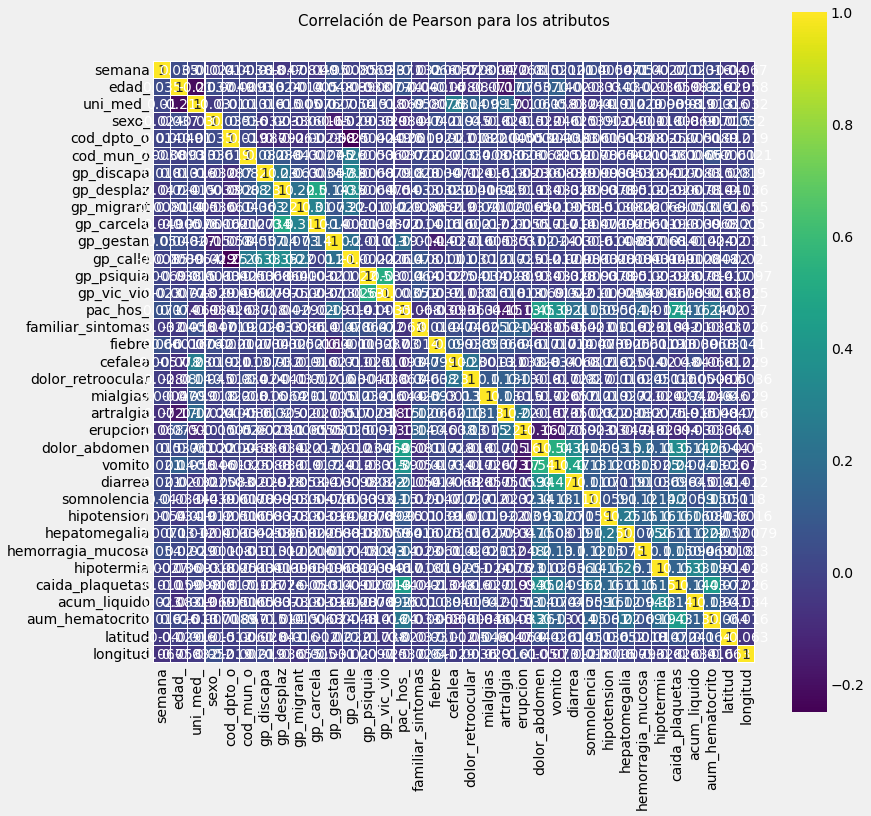

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlación de Pearson para los atributos', y=1.05, size=15)
sns.heatmap(df2.corr(), linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [ ]:
## variables disponibles
print(df2.columns)

Index(['semana', 'edad_', 'uni_med_', 'sexo_', 'cod_dpto_o', 'cod_mun_o',
       'gp_discapa', 'gp_desplaz', 'gp_migrant', 'gp_carcela', 'gp_gestan',
       'gp_calle', 'gp_psiquia', 'gp_vic_vio', 'pac_hos_', 'familiar_sintomas',
       'fiebre', 'cefalea', 'dolor_retroocular', 'mialgias', 'artralgia',
       'erupcion', 'dolor_abdomen', 'vomito', 'diarrea', 'somnolencia',
       'hipotension', 'hepatomegalia', 'hemorragia_mucosa', 'hipotermia',
       'caida_plaquetas', 'acum_liquido', 'aum_hematocrito', 'latitud',
       'longitud'],
      dtype='object')


In [ ]:
#Generación de datos aleatorios alrededor de 3 centroides
features, true_labels = make_blobs(
  n_samples=200,
  centers=3,
  cluster_std=2.75,
  random_state=42
)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels

array([1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       2, 1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0,
       1, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2,
       1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 1])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

# **Determinación de la cantidad adecuada de clusters**

**Método del codo**

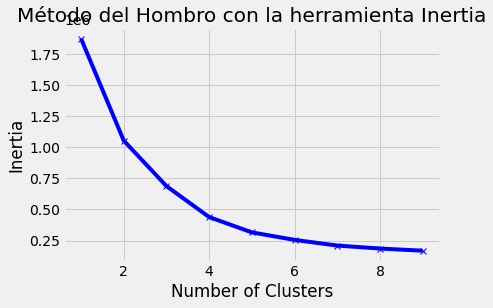

In [ ]:
inertias = [] 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(df2) 
    kmeanModel.fit(df2)     
    inertias.append(kmeanModel.inertia_) 
    
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia') 
plt.title('Método del Hombro con la herramienta Inertia') 
plt.show()

In [ ]:
# ajustado el algoritmo Kmeans ak conjunto de datos
from sklearn.cluster import KMeans

## Número de clústers a utilizar. En este caso 4 clústers
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df2)
y_kmeans1=y_kmeans+1
cluster = pd.DataFrame(y_kmeans1)
today_sub=df2
# Adding cluster to the Dataset
today_sub['cluster'] = cluster
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(today_sub.groupby('cluster').mean(),1))

## Identificación de los valores promedio ( centroides) 
kmeans_mean_cluster

,semana,edad_,uni_med_,sexo_,cod_dpto_o,cod_mun_o,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,...,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud
cluster,,,,,,,,,,,,,,,,,,,,,
1,24.5,18.3,1.1,1.5,67.9,275.9,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.9,2.0,2.0,7.1,-73.1
2,24.3,31.8,1.0,1.2,62.2,13.8,1.9,1.9,1.9,2.0,...,2.0,2.0,2.0,2.0,2.0,1.8,2.0,1.8,7.1,-73.1
3,25.7,54.6,1.0,1.5,68.0,276.1,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.9,2.0,2.0,7.1,-73.1
4,26.5,25.0,1.0,1.5,44.0,628.5,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.5,2.0,2.0,7.1,-73.1


In [ ]:
kl = KneeLocator(
  range(1, 10), inertias, curve="convex", direction="decreasing"
)
kl.elbow

4

#**RESULTADOS**

Según los resultados vamos a tratar de explicar el porque el algoritmo agrupó los datos de la forma escrita en la anterior celda.✅
Podemos encontrar resultados obvios y otros que no podremos explicar.

**a) Cluster 1:** Se encuentran el grupo de casos correspondientes al departamento de Santander, con un promedio de edad de 18 años, los casos concentran en el municipio de Floridablanca y la variación de los sintomas no difiere en gran medida de los otros grupos.

**b) Cluster 2:** Se encuentran el grupo de casos correspondientes al departamento de Santander, on un promedio de edad de 32 años, los cuales se concentran en otros municipios correspondientes a los codigos de 0 a 91 y la variación de los sintomas no difiere en gran medida de los otros grupos.

**c) Cluster 3:** Se encuentran el grupo de casos correspondientes al departamento de Santander, on un promedio de edad de 55 años, os se casos concentran en el municipio de Floridablanca y la variación de los sintomas no difiere en gran medida de los otros grupos.

**d) Cluster 4:** Se encuentran el grupo de casos correspondientes a otros departamentos y municipios, con un promedio de edad de 25 años y la variación de los sintomas solo difiere un poco en la caida de plaquetas.

# **Coeficiente de silueta**

In [ ]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

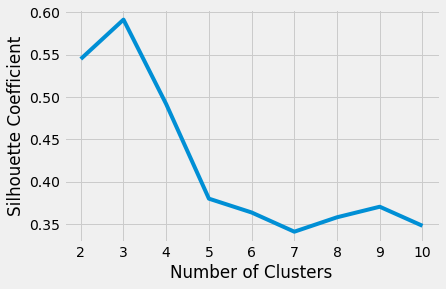

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()